<center><h1>WELCOME TO THE BAYESIAN WORLD !</h1></center>

![Doing Bayesian Data Analysis](https://sites.google.com/site/doingbayesiandataanalysis/_/rsrc/1403617861639/config/customLogo.gif?revision=5)




Cualquier paradigma estadístico, sea bayesiano o no, contiene por lo menos estas tres entidades:

1.  **Parámetros desconocidos** 
2.  **datos (observaciones)**
3. **modelos**

En ese sentido, los modelos son nuestro instrumento para relacionar las observaciones con los parámetros y **aprender del fenómeno**.

---

<center><H2>¿Cuál es la visión frecuentista?</H2></center>


*   Los datos observados se consideran **aleatorios**, por qué son resultado de procesos aleatorios.
*   Los parámetros del modelo son **fijos**, por qué a pesar de ser desconocidos, asumimos que el proceso que generó los datos es uno en particular.

En este sentido todo modelo frecuentista pasa por obtener una función:

\begin{align}
f(X| \theta)
\end{align}

Y el fin último es encontrar **estimadores**  de esos parámetros, que no tengan sesgo y que tengan la mínima varianza.

---

<center> <h2>La visión bayesiana del mundo :) !</h2> </center>

* Los datos observados se consideran **fijos** una vez recolectados
* La **incertidumbre** alrededor del los parámetros se considera una variable **aleatoria** 


En este sentido todo modelo bayesiano para por encontrar **distribuciones de probabilidad** dónde se encuentran esos parámetros:

\begin{align}
P(\theta|X)
\end{align}

---

<center> <h2>¿QUÉ SIGNIFICA LA SIGUIENTE EXPRESIÓN? </h2> </center>

\begin{align}
P(\bar{Y }-1.96*\frac{\sigma}{\sqrt{n}} < \theta < \bar{Y }+1.96*\frac{\sigma}{\sqrt{n}} ) = 0.95
\end{align}




In [0]:
!pip install arviz

     |████████████████████████████████| 1.3MB 3.3MB/s 
     |████████████████████████████████| 4.1MB 38.4MB/s 
     |████████████████████████████████| 307kB 27.6MB/s 


In [0]:
import pandas as pd
import matplotlib.pyplot as plt
from IPython.core.pylabtools import figsize
import numpy as np 
import seaborn as sns
import pymc3 as pm
from theano import as_op
import theano.tensor as tt
from scipy import stats
from random import shuffle
import matplotlib as mpl
import theano
import sklearn
from sklearn import datasets
from sklearn.preprocessing import scale
from sklearn.model_selection import train_test_split
from sklearn.datasets import make_moons
plt.style.use('ggplot')
figsize(7,5)
plt.rcParams['savefig.dpi'] = 100
plt.rcParams['figure.dpi'] = 100

<center><h1> ¿Estoy enfermo? (Caso discreto)</h1></center>

>> * Vas a un lugar recondito en donde hay un brote de una enfermedad extraña (con una incidencia del .1%), te das cuenta que puede que estés contagiado, te haces un test y resulta positivo.


>>> *El test identifica con un **.99** de probabilidad a una persona con la enfermedad*


>>>> $H_o$: Tener la enfermedad

>>>> $H_a$: No tener la enfermedad


>>>> **¿Qué probabilidad hay de tener la enfermedad?**

---

<center><h1> Introduciendo el teorema de Bayes</h1> <center>

  
  ![Bayes_Formula](https://raw.githubusercontent.com/fonnesbeck/intro_stat_modeling_2017/95ddd5ae6a9f1f2d3038e9d054f908cef7752f24/notebooks/images/bayes_formula.png)


## Resolviendo para nuestro problema:

$P(E)  = .001$  (Es el conocimiento a priori que tenemos de la incidencia de la enfermedad)

$ P(T+|E) = .99$ ( Es la evidencia que tenemos, la probabilidad de salir positivo dado que estás enfermo)

# ¿Qué es P(T+)?

Bueno esto se puede descomponer en secciones gracias al **teorema total de probabilidad**:

$P(T+) = P(E)*P(T+|E)+P(E^c)*P(T+|E^c)$

$P(T+) = (.001 * .99) + (.999*.01) = .01098$


In [0]:
def Bayes_posterior(prior, likelihood, total):
  Posterior = prior * likelihood / total
  return Posterior

In [0]:
prior_E = .001
likelihood_E = .99
total_prop_Test = .01098

In [0]:
Posterior = Bayes_posterior(prior_E, likelihood_E, total_prop_Test)
round(Posterior,2)

0.09

<h1><center>¿Tiene sentido?</center></h1>


>>> Imaginen el siguiente escenario, de una muestra de 1000 personas, existe 1 que **SI** tiene la enfermedad, pero existen 11 personas que pueden salir positivos independiente a que tengan o no la enfermedad.



In [0]:
round(1/11,2)

0.09

<h1><center> Double CHECK</center></h1>

>>>> Ahora queremos una segunda opinión, creemos que el laboratorio que nos hizo el test está mal. Y volvemos a salir positivos.

>>>> **¿Cómo afecta  a nuestra certidumbre de tener la enfermedad?**

In [0]:
New_Prior = Posterior
total_prop_second_test = New_Prior * .99 + (1-New_Prior) * .01
##----- Ajustamos nuestras creencias

Double_check = Bayes_posterior(New_Prior, likelihood_E, total_prop_second_test)
round(Double_check,2)

0.91

<h1><center>¿Cuántos estudios se necesitan para alcanzar el 95% de probabilidad de tener la enfermedad?</center></h1>


In [0]:
New_Prior = .001
Number_of_test = 0 
while New_Prior <= 0.95:
  New_total = New_Prior * .99 + (1-New_Prior) * .01
  New_Prior = Bayes_posterior(New_Prior, likelihood_E, New_total)
  Number_of_test += 1
  print(New_Prior)
Number_of_test

0.09016393442622951
0.9075000000000001
0.9989714794017902


3

<h1><center> ¿Entonces por qué no se usa tanto la inferencia bayesiana en el día a día?</center></h1>


\begin{align}
 P(X) 
\end{align}


---
>> En el ejercicio anterior, pudimos calcular la $P(X)$ gracias al teorema de probabilidad total, dado que es un caso discreto se resuelve con la sumatoria, de cada subdivisión del set $ X \theta $

>>En el caso del caso continuo, esto sería una integral que pocas veces se puede resolver analíticamente:
\begin{align}
P(X) = \int_\theta{P(\theta) P(X|\theta)}
\end{align}

 Dónde:
 
 * $P(\theta) P(X|\theta)$ es el numerador de la ley de bayes
 
 *$ \frac{P(\theta) P(X|\theta)}{P(X)}  - \text{Bayes theorem}$

 
<h1><center> Monte Carlo Markov Chains </center></h1>

*Monte Carlo* es un método númerico que sirve para resolver **integrales sin solución análitica** , *Markov Chains* son un método para resolver interdependencias probabilisticas.

>>> De tal forma que **MonteCarlo Markov Chains** nos ayuda a resolver el problema que representa la integral de

\begin{align}
P(X)
\end{align}

Para ejemplificarlo, vamos a resolver la siguiente integral de forma simbólica y por simulación de montecarlo:

\begin{align}
\int_{0}^{1}{1-x^2}
\end{align}


In [0]:
# resolución simbólica
from sympy import * 
x = symbols('x')
integrate(1-(x**2),(x, 0, 1))

2/3

In [0]:
# montecarlo 
random_numbers = np.random.uniform(0,1,1000)
function_values = 1-(random_numbers**2)
y_values = np.random.uniform(0,1,1000)

Text(0.5, 1.0, 'El área estimada es: 0.65')

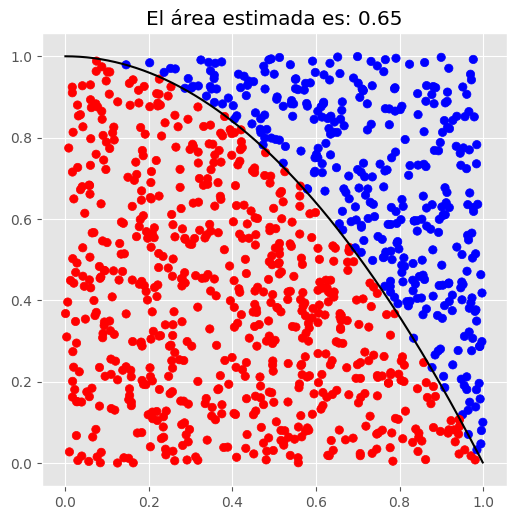

In [0]:
figsize(6,6)
col = np.where(y_values>function_values,'b','r')
count = sum(np.char.count(col,'r'))
plt.scatter(random_numbers,y_values,c=col)
x = np.arange(0.0, 1.0, 0.001)
plt.plot(x,1-x**2, c = 'k')
plt.title("El área estimada es: {}".format(count/1000))

 <h1><center>Conociendo PyMC3:</center></h1>

*   PyMC3 utiliza **métodos de sampleo** para resolver nuestros modelos bayesianos las variables que estarán incluidas en nuestro modelos se inicializan dentro del contexto *Model()*:
  *  with pm.Model() as *nombre del modelo*:
  * theta = pm.exponential(**"nombre de la variable"**, **parametro de la variable**)


* Existen dos tipos de variables en **probabilidad**:
 *   **Estocásticas**: Aquellas que aun conociendo todos los parámetros de la variable siguien siendo aleatorias 
 *   **Deterministicas**: Aquellas que si se conocen los parámetros de la variable dejan de ser aleatorias



<h1><center> Ejemplo Bayesian Estimation - Todo inicia con una moneda </center></h1>


* Vamos a tratar de análizar si una moneda es o no es justa
* Toda inferencia Bayesiana tiene tres partes:


>>1.   **Especificación** del modelo probabilístico
2.   **Calcular** la distribución posterior
3.  **Chequeo** del modelo

Y **aún cuando parece que es mucho rollo calcular la distribución posterior**, una vez calculada tenemos:


* Estimados puntuales
* Intervalos de credibilidad
* Cuantiles
* Predicciones




In [0]:
Tosses = np.where(np.random.uniform(0,1,100)>.5,1,0)
print(Tosses)

[1 0 0 0 1 1 0 1 1 0 1 1 0 1 0 1 1 1 1 1 0 0 0 1 0 1 0 1 1 1 0 0 0 0 0 1 0
 1 0 0 1 0 1 0 0 1 1 0 1 0 1 1 1 1 1 0 1 1 0 0 0 0 1 0 0 0 1 0 0 1 1 1 1 0
 0 0 1 1 0 1 1 0 1 1 1 0 0 0 1 1 1 1 0 0 1 0 0 0 0 1]


In [0]:
with pm.Model() as coin_model:
  p_prior = pm.Uniform('p',0, 1)
  likelihood = pm.Bernoulli('likelihood', p=p_prior, observed = Tosses)

In [0]:
with coin_model:
  coin_samples = pm.sample(3000,tune=1500)

Auto-assigning NUTS sampler...
Initializing NUTS using jitter+adapt_diag...
Sequential sampling (2 chains in 1 job)
NUTS: [p]
100%|██████████| 4500/4500 [00:02<00:00, 2072.97it/s]


/usr/local/lib/python3.6/dist-packages/arviz/data/io_pymc3.py:56: FutureWarning: arrays to stack must be passed as a "sequence" type such as list or tuple. Support for non-sequence iterables such as generators is deprecated as of NumPy 1.16 and will raise an error in the future.
  chain_likelihoods.append(np.stack(log_like))


array([[<matplotlib.axes._subplots.AxesSubplot object at 0x7fe13bf3f080>,
      dtype=object)

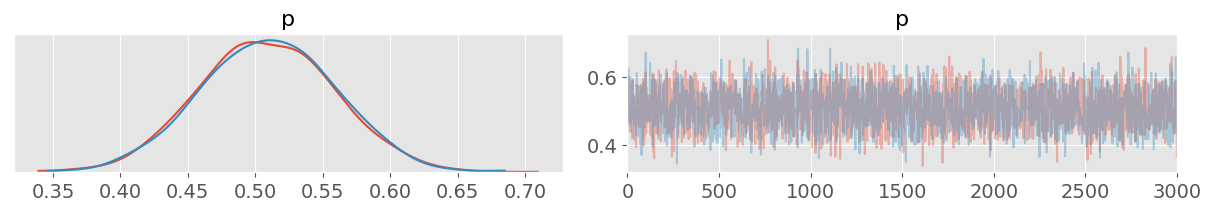

In [0]:
pm.traceplot(coin_samples)

/usr/local/lib/python3.6/dist-packages/arviz/data/io_pymc3.py:56: FutureWarning: arrays to stack must be passed as a "sequence" type such as list or tuple. Support for non-sequence iterables such as generators is deprecated as of NumPy 1.16 and will raise an error in the future.
  chain_likelihoods.append(np.stack(log_like))


array([<matplotlib.axes._subplots.AxesSubplot object at 0x7fe13bae1908>],
      dtype=object)

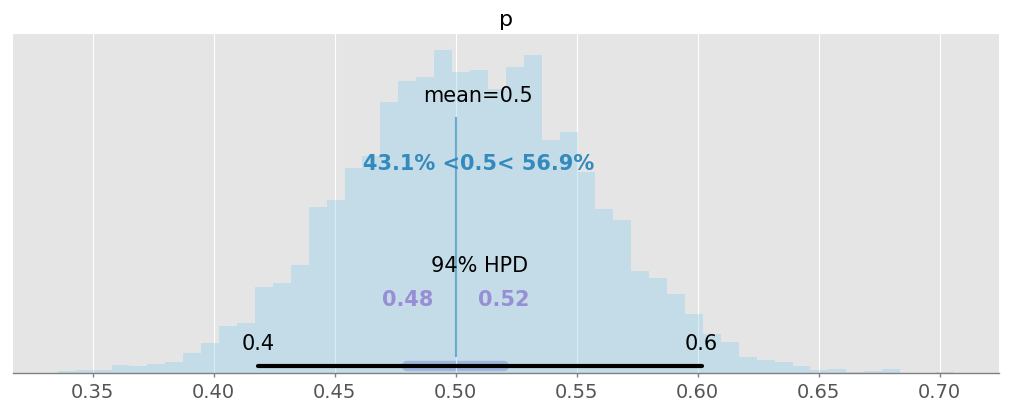

In [0]:
figsize(10,4)
pm.plot_posterior(coin_samples[100:],rope =[0.48,0.52], point_estimate = 'mean', ref_val = 0.5 , kind = 'hist', color= "#87ceeb")

<h1><center> ¿Cómo se actualiza nuestra creencia conforme llegan nuevos datos? </center></h1>

In [0]:
def from_posterior(param, samples):
    smin, smax = np.min(samples), np.max(samples)
    width = smax - smin
    x = np.linspace(smin, smax, 100)
    y = stats.gaussian_kde(samples)(x)

    # what was never sampled should have a small probability but not 0,
    # so we'll extend the domain and use linear approximation of density on it
    x = np.concatenate([[x[0] - 3 * width], x, [x[-1] + 3 * width]])
    y = np.concatenate([[0], y, [0]])
    return pm.distributions.Interpolated(param, x, y)

In [0]:
sub_traces = [coin_samples]

In [0]:
for _ in range(5):

    # generamos más datos (lanzarémos 5 batches de 300)
    Tosses = np.where(np.random.uniform(0,1,300)>.5,1,0)

    coin_model = pm.Model()
    with coin_model:
      
        # actualizamos nuestra creencia de probabilidad de caras de la posterior pasada
        prob_update = from_posterior('p', coin_samples['p'])
        
        likelihood = pm.Bernoulli('likelihood', p=prob_update, observed = Tosses)

        # draw 10000 posterior samples
        coin_samples = pm.sample(3000,tune=1000)
        sub_traces.append(coin_samples)

Auto-assigning NUTS sampler...
Initializing NUTS using jitter+adapt_diag...
Sequential sampling (2 chains in 1 job)
NUTS: [p]
100%|██████████| 4000/4000 [00:02<00:00, 1535.38it/s]
Auto-assigning NUTS sampler...
Initializing NUTS using jitter+adapt_diag...
Sequential sampling (2 chains in 1 job)
NUTS: [p]
100%|██████████| 4000/4000 [00:02<00:00, 1484.89it/s]
Auto-assigning NUTS sampler...
Initializing NUTS using jitter+adapt_diag...
Sequential sampling (2 chains in 1 job)
NUTS: [p]
100%|██████████| 4000/4000 [00:02<00:00, 1475.22it/s]
Auto-assigning NUTS sampler...
Initializing NUTS using jitter+adapt_diag...
Sequential sampling (2 chains in 1 job)
NUTS: [p]
100%|██████████| 4000/4000 [00:02<00:00, 1472.28it/s]
Auto-assigning NUTS sampler...
Initializing NUTS using jitter+adapt_diag...
Sequential sampling (2 chains in 1 job)
NUTS: [p]
100%|██████████| 4000/4000 [00:02<00:00, 1519.63it/s]


Posterior distributions after 6 iterations.


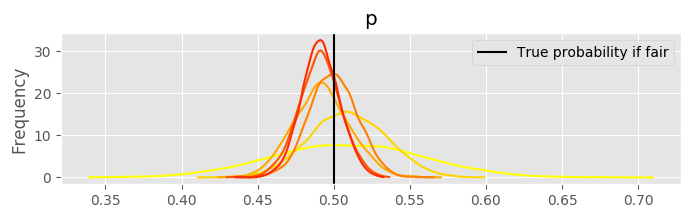

In [0]:
print('Posterior distributions after ' + str(len(sub_traces)) + ' iterations.')
cmap = mpl.cm.autumn
for param in ['p']:
    plt.figure(figsize=(8, 2))
    for update_i, coin_samples in enumerate(sub_traces):
        samples = coin_samples[param]
        smin, smax = np.min(samples), np.max(samples)
        x_priors = np.linspace(smin, smax, 100)
        y_priors = stats.gaussian_kde(samples)(x_priors)
        plt.plot(x_priors, y_priors, color=cmap(1 - update_i / len(sub_traces)))
    plt.axvline({'p': 0.5}[param], c='k', label = "True probability if fair")
    plt.ylabel('Frequency')
    plt.legend()
    plt.title(param)
    plt.show()

/usr/local/lib/python3.6/dist-packages/arviz/data/io_pymc3.py:56: FutureWarning: arrays to stack must be passed as a "sequence" type such as list or tuple. Support for non-sequence iterables such as generators is deprecated as of NumPy 1.16 and will raise an error in the future.
  chain_likelihoods.append(np.stack(log_like))


array([<matplotlib.axes._subplots.AxesSubplot object at 0x7fe13bcd5eb8>],
      dtype=object)

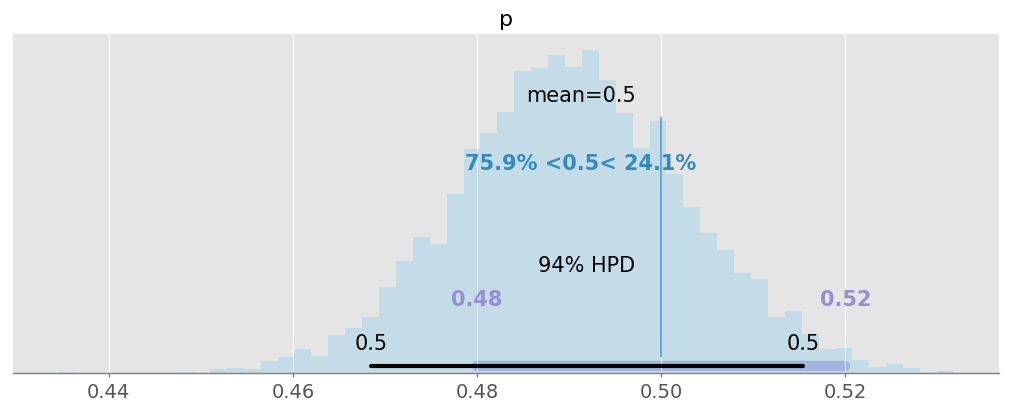

In [0]:
figsize(10,4)
pm.plot_posterior(coin_samples,rope =[0.48,0.52], ref_val = 0.5 , kind = 'hist', color= "#87ceeb")

In [0]:
pm.summary(coin_samples)

,mean,sd,mc_error,hpd_2.5,hpd_97.5,n_eff,Rhat
p,0.491251,0.012431,0.000247,0.467437,0.516435,2323.999442,1.0003


<center><h1> Estimación simple de niveles de radón (Caso real)</h1> </center>

Queremos contestar las siguientes dos preguntas:

* Cuál es la probabilidad de que la concentración media de log-radon es mayor a  **4 pCi/L** en el condado de Hennepin 
* La probabilidad de que cualquier casa escogida aleatoriamente tenga una lectura mayor a 4

>>>   La US EPA ha establecido un nivel de acción de **4 pCi/L**. Si se está por encima de este nivel de radón, la EPA recomienda que se tomen medidas correctivas para reducir su exposición al gas.






In [0]:
radon = pd.read_csv('http://www.math.chalmers.se/Stat/Grundutb/CTH/mve186/1415/radon.csv', index_col=0) 
radon.head()

,idnum,state,state2,stfips,zip,region,typebldg,floor,room,basement,windoor,rep,stratum,wave,starttm,stoptm,startdt,stopdt,activity,pcterr,adjwt,dupflag,zipflag,cntyfips,county,fips,Uppm,county_code,log_radon
0,5081.0,MN,MN,27.0,55735,5.0,1.0,1.0,3.0,N,,2,4.0,41,930.0,930.0,12088.0,12288.0,2.2,9.7,1146.499190,1.0,0.0,1.0,AITKIN,27001.0,0.502054,0,0.832909
1,5082.0,MN,MN,27.0,55748,5.0,1.0,0.0,4.0,Y,,5,2.0,40,1615.0,1615.0,11888.0,12088.0,2.2,14.5,471.366223,0.0,0.0,1.0,AITKIN,27001.0,0.502054,0,0.832909
2,5083.0,MN,MN,27.0,55748,5.0,1.0,0.0,4.0,Y,,3,2.0,42,1030.0,1515.0,20288.0,21188.0,2.9,9.6,433.316718,0.0,0.0,1.0,AITKIN,27001.0,0.502054,0,1.098612
3,5084.0,MN,MN,27.0,56469,5.0,1.0,0.0,4.0,Y,,2,2.0,24,1410.0,1410.0,122987.0,123187.0,1.0,24.3,461.623670,0.0,0.0,1.0,AITKIN,27001.0,0.502054,0,0.095310
4,5085.0,MN,MN,27.0,55011,3.0,1.0,0.0,4.0,Y,,3,2.0,40,600.0,600.0,12888.0,13088.0,3.1,13.8,433.316718,0.0,0.0,3.0,ANOKA,27003.0,0.428565,1,1.163151


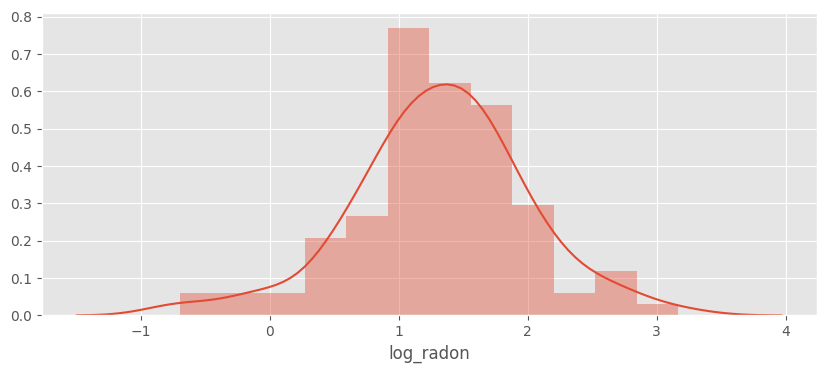

In [0]:
figsize(10,4)
hennepin_radon = radon.query('county=="HENNEPIN"').log_radon
sns.distplot(hennepin_radon)

<center><h3> ¿A qué distribución se les hace familiar?</h3></center>

##Baby steps:

###Paso 1:

* Definir el modelo probabilístico:
 * Priors
 * Likelihood
 
\begin{align}
LogRadon_{i} \sim N(\mu,\sigma^2)
\end{align}

>¿Esta distribución es **Likelihood** o **Prior** ?

 En este caso es LogRadon es nuestra distribución de muestreo (**likelihood**) y la distribución de muestreo nos dicta que debemos asignar dos **priors**
 
 Vamos a asignar un prior a $\mu$ y a $\sigma$, que son parámetros desconocidos de nuestra **likelihood**:
 
\begin{align}
\mu \sim N(0,10^2)
\end{align}
\begin{align}
\sigma \sim U(0,10)
\end{align}

<center><h3> ¿Por qué estos priors?</h3></center>

In [0]:
with pm.Model() as radon_model:
    
    μ = pm.Normal('μ', mu=0, sd=10)
    σ = pm.Uniform('σ', 0, 10)
    likelihood = pm.Normal('Likelihood', mu=μ, sd=σ, observed=hennepin_radon)

### Paso 2:
* Calcular la distribución posterior

In [0]:
RANDOM_SEED = 666

with radon_model:

    samples = pm.fit(random_seed=RANDOM_SEED).sample(1000)

Average Loss = 135.51: 100%|██████████| 10000/10000 [00:06<00:00, 1624.85it/s]
Finished [100%]: Average Loss = 135.49


### Ver los resultados:

/usr/local/lib/python3.6/dist-packages/arviz/data/io_pymc3.py:56: FutureWarning: arrays to stack must be passed as a "sequence" type such as list or tuple. Support for non-sequence iterables such as generators is deprecated as of NumPy 1.16 and will raise an error in the future.
  chain_likelihoods.append(np.stack(log_like))


array([<matplotlib.axes._subplots.AxesSubplot object at 0x7f6b1e687c50>],
      dtype=object)

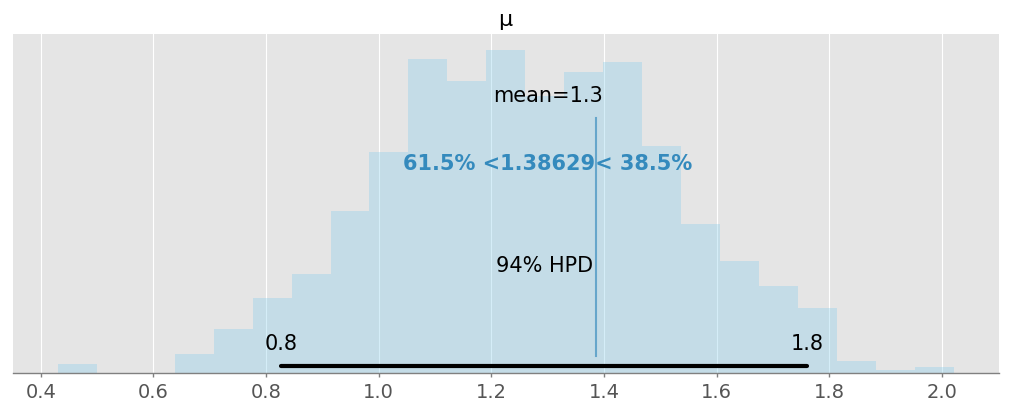

In [0]:
figsize(10,4)
pm.plot_posterior(samples, var_names=['μ'], ref_val=np.log(4), kind = "hist", color= "#87ceeb")

In [0]:
pm.summary(samples)

,mean,sd,mc_error,hpd_2.5,hpd_97.5
μ,1.299787,0.249799,0.007738,0.826978,1.781901
σ,0.929096,0.301756,0.009848,0.405157,1.539761


<h1><center> ¿Alguien que me ayude a interpretar los resultados? </center></h1>

>>>>> * ¿Cuál es la probabilidad de que la concentración media de log-radon es mayor a  **4 pCi/L** en el condado de Hennepin?
>>>>> * ¿Cuál es la probabilidad de que cualquier casa escogida aleatoriamente tenga una lectura mayor a 4?

#Predicción

### Posterior Predictive Distribution

\begin{align}
P(z|y) =\int_{\theta} P(z|\theta)P(\theta|y)d\theta
\end{align}

dónde:
* **z** es el valor a predecir
* **y** los datos para general el modelo

In [0]:
mus = samples['μ']
sigmas = samples['σ']

In [0]:
radon_samples = pm.Normal.dist(mus, sigmas).random()
print("La probabilidad posterior de que una casa seleccionada aleatoriamente tenga un nivel mayor a 4 pCi/L es de {}".format((radon_samples > np.log(4)).mean()))

La probabilidad posterior de que una casa seleccionada aleatoriamente tenga un nivel mayor a 4 pCi/L es de 0.462


<h1><center>¿Qué paso nos falta?</center></h1>

##Paso 3:

#CHECAR NUESTRO MODELO !!!! ( a mucha gente se le olvida :P)

* **Posterior predictive checks**: Implica generar datos simulados utilizando el modelo que construimos y comparar esos datos con los datos observados



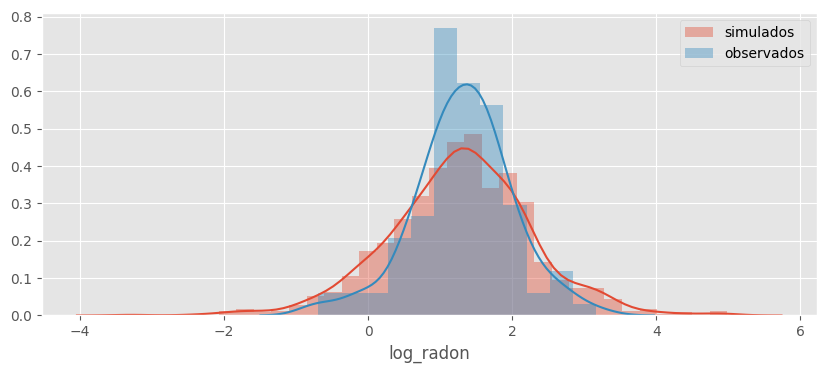

In [0]:
sns.distplot(radon_samples, label='simulados')
sns.distplot(hennepin_radon, label='observados')
plt.legend()

* **Sensibilidad a los priors**: Implica generar un modelo con priors completamente distintos y observar si la inferencia cambia 



In [0]:

with pm.Model() as prior_sensitivity:
    
    μ = pm.Flat('μ')
    σ = pm.HalfCauchy('σ', 5)
    
    dist = pm.Normal('dist', mu=μ, sd=σ, observed=hennepin_radon)
    
    sensitivity_samples = pm.fit(random_seed=RANDOM_SEED).sample(1000)

Average Loss = 123.54: 100%|██████████| 10000/10000 [00:06<00:00, 1452.69it/s]
Finished [100%]: Average Loss = 123.5


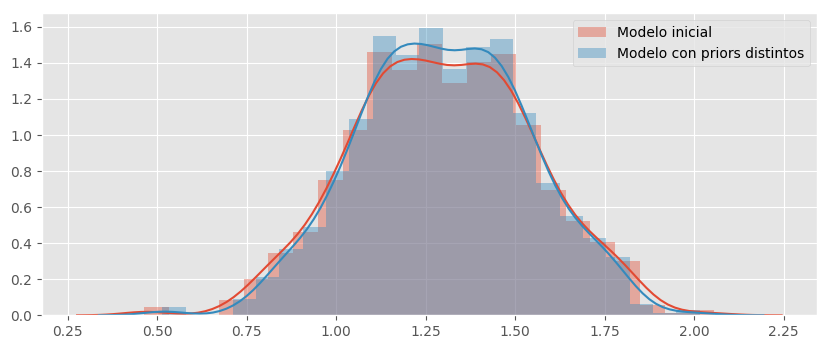

In [0]:
sns.distplot(samples['μ'], label='Modelo inicial')
sns.distplot(sensitivity_samples['μ'], label='Modelo con priors distintos')
plt.legend()

# Estimación de parámetros Bayesiana (más complejo):

* Sospechamos que después del evento de Coachella, pudo existir un brote de una enfermedad de transmisión sexual, contamos con los registros del hospital con casos verificados de la enfermedad **¿Cómo podemos modelar esto?**

(-1, 72)

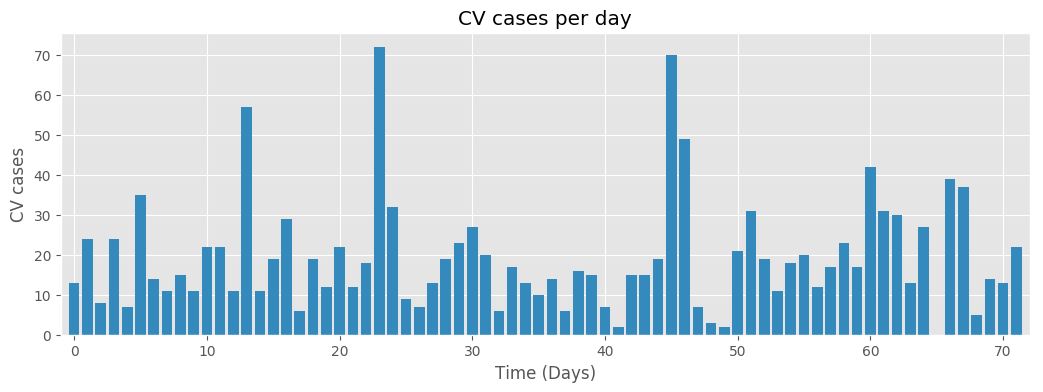

In [0]:
CV_Cases = np.array([13,24,8,24,7,35,14,11,15,11,22,22,11,57,11,19,29,6,19,12,22,12,18,72,32,9,7,13,19,23,27,20,6,17,13,10,14,6,16,15,7,2,15,15,19,70,49,7,3
,2,21,31,19,11,18,20,12,17,23,17,42,31,30,13,27,0,39,37,5,14,13,22])
plt.bar(np.arange(len(CV_Cases)),CV_Cases, color = "#348ABD")
plt.xlabel("Time (Days)")
plt.ylabel("CV cases")
plt.title("CV cases per day")
plt.xlim(-1,len(CV_Cases))


# Modelaje:


*   ¿Cómo podemos modelar el fenómeno que observamos?
  *   ¿Que distribución de probabilidad puede modelar un número de cuentas en un tiempo determindado?

\begin{align}
Cases_{days} \sim \text{Poisson}(\lambda)
\end{align}

Entonces, si nosotros suponemos que el concierto de coachella modificó la tasa de eventos matemáticamente se podría traducir a:

\begin{align}
\lambda = 
\begin{cases}
\lambda_1  & \text{if } t \lt \tau \cr
\lambda_2 & \text{if } t \ge \tau
\end{cases}
\end{align}

Donde $\tau$ lo podemos interpretar como el día donde $\lambda_1$ y $\lambda_2$ cambian, es decir si coachella no tuvo efecto sobre la incidencia de la enfermedad,  $\lambda_1$ y $\lambda_2$ deberían ser iguales.


* ¿Conocemos $\lambda$?
* ¿Conocemos $\tau$?


>>>"Debemos recordar que la idea de la inferencia bayesiana es tratar de modelar el **proceso generativo de los datos** a través de **distribuciones de probabilidad**"

* Lo que no conocemos (parámetros) les tenemos que asignar una distribución de probabilidad:

\begin{align}
\lambda_1 \sim \text{Exp}( \alpha ) 
\end{align}

\begin{align}
\lambda_2 \sim \text{Exp}( \alpha ) 
\end{align}

\begin{align}
 \tau\sim\text{U(1,72)}
\end{align}

Sin embargo la distribución de probabilidad *exponencial* tiene un parámetro $\alpha$ que también es desconocido, que también debe ser modelado:

\begin{align}
\frac{1}{N}\sum_{i=0}^N \;Cases_{Days} \approx E[\; \lambda \; |\; \alpha ] = \frac{1}{\alpha}
\end{align}

In [0]:
with pm.Model() as Coachella:
    alpha = 1.0/CV_Cases.mean()  # Definimos alpha 
    lambda_1 = pm.Exponential("lambda_1", alpha) # Conocimiento a priori de lambda 1
    lambda_2 = pm.Exponential("lambda_2", alpha) # Conocimiento a priori de lambda 2
    
    tau = pm.DiscreteUniform("tau", lower=0, upper=len(CV_Cases) - 1) # Conocimiento a priori de tau
    
    idx = np.arange(len(CV_Cases)) # Dias 
    lambda_ = pm.math.switch(tau > idx, lambda_1, lambda_2) # Definimos que lambda 1 y 2 son derivadas de un punto de cambio en lambda
    Likelihood = pm.Poisson("Likelihood", lambda_, observed=CV_Cases)

In [0]:
with Coachella:
    trace = pm.sample(10000, tune=5000)
    
lambda_1_samples = trace['lambda_1']
lambda_2_samples = trace['lambda_2']
tau_samples = trace['tau']

Sequential sampling (2 chains in 1 job)
CompoundStep
>NUTS: [lambda_2, lambda_1]
>Metropolis: [tau]
100%|██████████| 15000/15000 [00:14<00:00, 1004.54it/s]
The estimated number of effective samples is smaller than 200 for some parameters.


Text(0, 0.5, 'probability')

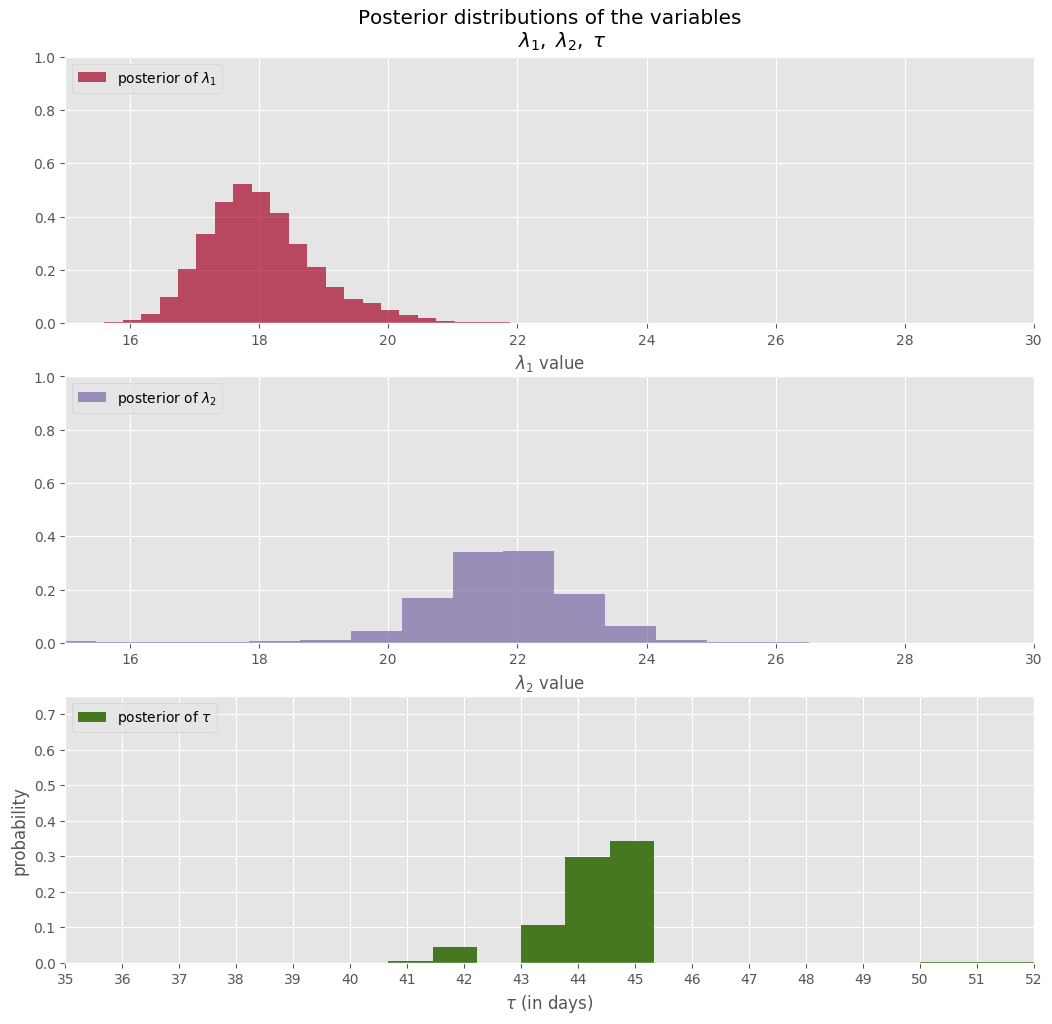

In [0]:
figsize(12.5, 12)


ax = plt.subplot(311)
ax.set_autoscaley_on(False)

plt.hist(lambda_1_samples, histtype='stepfilled', bins=30, alpha=0.7,
         label="posterior of $\lambda_1$", color="#A60628", density = True)
plt.legend(loc="upper left")
plt.title(r"""Posterior distributions of the variables
    $\lambda_1,\;\lambda_2,\;\tau$""")
plt.xlim([15, 30])
plt.xlabel("$\lambda_1$ value")

ax = plt.subplot(312)
ax.set_autoscaley_on(False)
plt.hist(lambda_2_samples, histtype='stepfilled', bins=30, alpha=0.7,
         label="posterior of $\lambda_2$", color="#7A68A6", density = True)
plt.legend(loc="upper left")
plt.xlim([15, 30])
plt.xlabel("$\lambda_2$ value")

plt.subplot(313)
w = 1.0 / tau_samples.shape[0] * np.ones_like(tau_samples)
plt.hist(tau_samples, bins=len(CV_Cases), alpha=1,
         label=r"posterior of $\tau$",
         color="#467821", weights=w, rwidth=1,)
plt.xticks(np.arange(len(CV_Cases)))
plt.legend(loc="upper left")
plt.ylim([0, .75])
plt.xlim([35, len(CV_Cases)-20])
plt.xlabel(r"$\tau$ (in days)")
plt.ylabel("probability")

<h1><center> ¿Cómo comprobarían que efectivamente ambas medias son distintas?</center></h1>

<h1><center> De tal modo que no solo hemos visto que la media de casos cambió, si no que construimos un modelo del proceso generativo de los datos (el fenómeno)</center></h1>

![Proceso_generativo](http://i.imgur.com/7J30oCG.png)


* Dado que ya tenemos definido el proceso que genera nuestros datos, podemos incluso simular fenómenos generados con el mismo mecanismo.

In [0]:
tau = np.random.randint(0, 72)
print(tau)
alpha = 1.0/20
lambda_1, lambda_2 = np.random.exponential(scale=1/alpha, size=2)
print(lambda_1, lambda_2)

28
41.71059640672035 3.965319682011055


In [0]:
data = np.r_[stats.poisson.rvs(mu=lambda_1, size=tau), stats.poisson.rvs(mu=lambda_2, size = 72 - tau)]

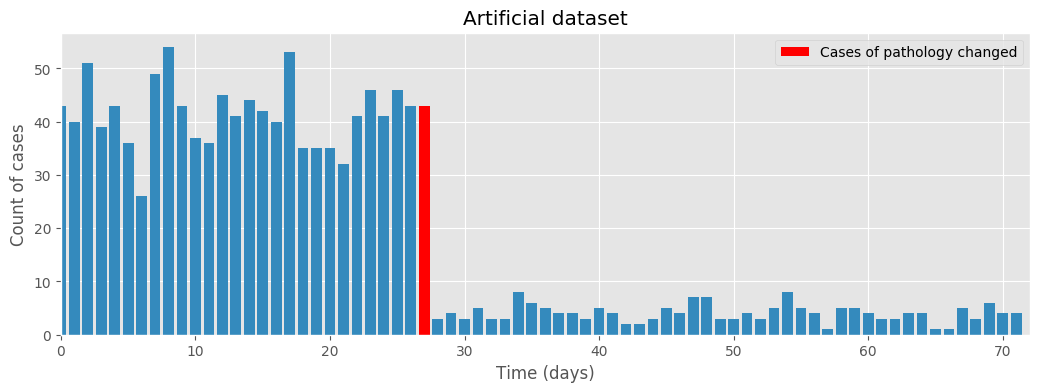

In [0]:
figsize(12.5,4)
plt.bar(np.arange(72), data, color="#348ABD")
plt.bar(tau-1, data[tau - 1], color="r", label="Cases of pathology changed")
plt.xlabel("Time (days)")
plt.ylabel("Count of cases")
plt.title("Artificial dataset")
plt.xlim(0, 72)
óplt.legend();

<h1><center> ¿ Cómo hacemos una prueba de hipótesis Bayesiana ? </center></h1>

Escenario: 

* Trabajamos en la fármaceutica *fulanita* estamos desarrollando un nuevo medicamento que creemos  tiene el potencial de mejorar la inteligencia de las personas

*Necesitamos tener **certeza estadística** de que efectivamente la pastilla tiene ese efecto*

* Tenemos muestras de un **RCT** con pacientes que reciben una pastilla de azucar y pacientes que reciben la pastilla que desarrolla farmaceutica *fulanita*.

Los datos son los siguientes:



In [0]:
drug = np.array([  99.,  110.,  107.,  104.,  103.,  105.,  105.,  110.,   99.,
        109.,  100.,  102.,  104.,  104.,  100.,  104.,  101.,  104.,
        101.,  100.,  109.,  104.,  105.,  112.,   97.,  106.,  103.,
        101.,  101.,  104.,   96.,  102.,  101.,  100.,   92.,  108.,
         97.,  106.,   96.,   90.,  109.,  108.,  105.,  104.,  110.,
         92.,  100.])

placebo = np.array([  95.,  105.,  103.,   99.,  104.,   98.,  103.,  104.,  102.,
         91.,   97.,  101.,  100.,  113.,   98.,  102.,  100.,  105.,
         97.,   94.,  104.,   92.,   98.,  105.,  106.,  101.,  106.,
        105.,  101.,  105.,  102.,   95.,   91.,   99.,   96.,  102.,
         94.,   93.,   99.,   99.,  113.,   96.])



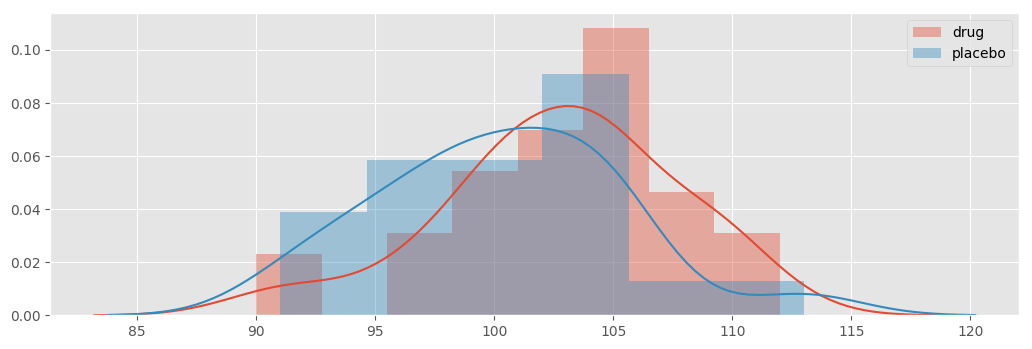

In [0]:
sns.distplot(drug,norm_hist=True, label = "drug")
sns.distplot(placebo,norm_hist=True, label = "placebo")
plt.legend()

<h1><center> ¿Ustedes que creen? ¿la droga es efectiva? </center></h1>


* Vamos a probarlo hagamos un **T-test** !!

In [0]:
from scipy.stats import ttest_ind

ttest_ind(drug, placebo)

Ttest_indResult(statistic=2.280670163432955, pvalue=0.025011500508647616)

<h1> FIRST: ¿ Qué significa el p-value ? </h1>

 ![bayesian_meme](https://www.dynamicyield.com/wp-content/uploads/2016/09/P-Value-Blog-Image.png)

---

<h3><center>Qué tan raro sería encontrar una muestra bajo la hipótesis nula </center></h3>


<h1><center>¿Qué tiene que decir bayes al respecto?</center></h1>



1.  DEFINIR EL MODELO PROBABILISTICO
2.  CALCULAR LA POSTERIOR
3.  CHECAR EL MODELO

 
* ¿Cuál es el promedio de IQ de la población?
 * ¿Qué desviación estandar tiene?
 * ¿Cómo podemos modelarlo?
 
* Supongamos que no tenemos idea de dónde debería estár la media de IQ:



\begin{align}
\mu_{IQ} \sim N(0, 100^2)
\end{align}

* Sabemos que el  IQ tiene una $\sigma$ = 10 :

\begin{align}
\sigma_{IQ} \sim HalfCauchy(10^2)
\end{align}

* Nuestros datos los queremos ajustar a una distribución T, para privilegiar los datos normales

\begin{align}
data \sim T(\mu_{IQ}, \sigma_{IQ}, \nu)
\end{align}

Qué es $\nu$ ? 

Son los grados de libertad de la distribución T para privilegiar datos normalmente distribuidos vamos a dar mas altas probabilidades a pocos grados de libertad **¿Cómo?**

\begin{align}
\nu \sim Exp(30)
\end{align}



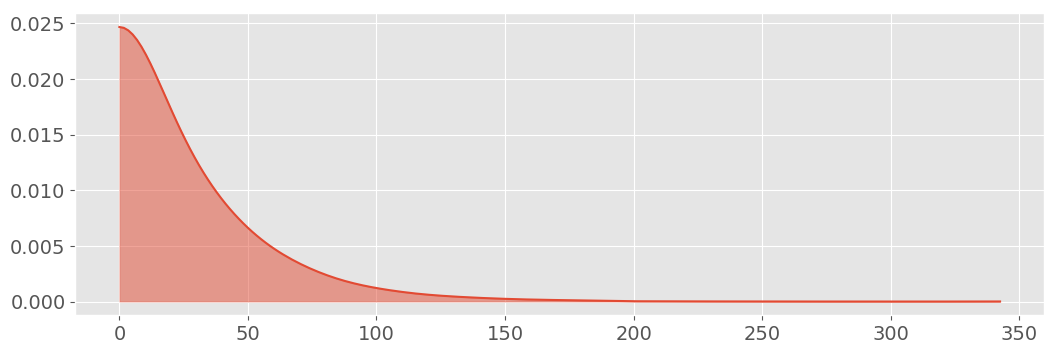

In [0]:
pm.kdeplot(np.random.exponential(30, size=10000), fill_kwargs={'alpha': 0.5});


<h1><center>Por lo que terminamos con un modelo de esta forma:</h1></center> 

![BEST](https://ericmjl.github.io/bayesian-stats-talk/images/kruschke_model.jpg)

In [0]:
with pm.Model() as kruschke_model:
    #MEDIAS
    mu_drug = pm.Normal('mu_drug', mu=0, sd=100**2)
    mu_placebo = pm.Normal('mu_placebo', mu=0, sd=100**2)
    #DESVIACIONES
    sigma_drug = pm.HalfCauchy('sigma_drug', beta=10)
    sigma_placebo = pm.HalfCauchy('sigma_placebo', beta=10)
    #GRADOS DE LIBERTAD
    nu = pm.Exponential('nu', lam=1/29) + 1
    # LIKELIHOODS
    drug_like = pm.StudentT('drug', nu=nu, mu=mu_drug, 
                            sd=sigma_drug, observed=drug)
    placebo_like = pm.StudentT('placebo', nu=nu, mu=mu_placebo, 
                               sd=sigma_placebo, observed=placebo)
    
    #DIFERENCIA DE MEDIAS
    diff_means = pm.Deterministic('diff_means', mu_drug - mu_placebo)
    
    #MEDICIONES A EXPLICAR EN UN MOMENTO
    pooled_sd = pm.Deterministic('pooled_sd', 
                                 np.sqrt(np.power(sigma_drug, 2) + 
                                         np.power(sigma_placebo, 2) / 2))
    effect_size = pm.Deterministic('effect_size', 
                                   diff_means / pooled_sd)

In [0]:
with kruschke_model:
    kruschke_trace = pm.sample(10000, tune = 1000)

Auto-assigning NUTS sampler...
Initializing NUTS using jitter+adapt_diag...
Sequential sampling (2 chains in 1 job)
NUTS: [nu, sigma_placebo, sigma_drug, mu_placebo, mu_drug]
100%|██████████| 11000/11000 [00:16<00:00, 662.07it/s]


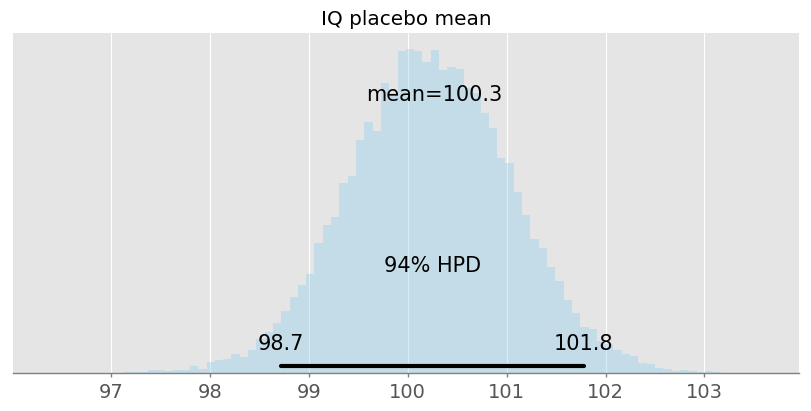

In [0]:
figsize(8,4)
pm.plot_posterior(kruschke_trace['mu_placebo'][2000:], color='#87ceeb', kind = "hist")
plt.title("IQ placebo mean")
plt.show()

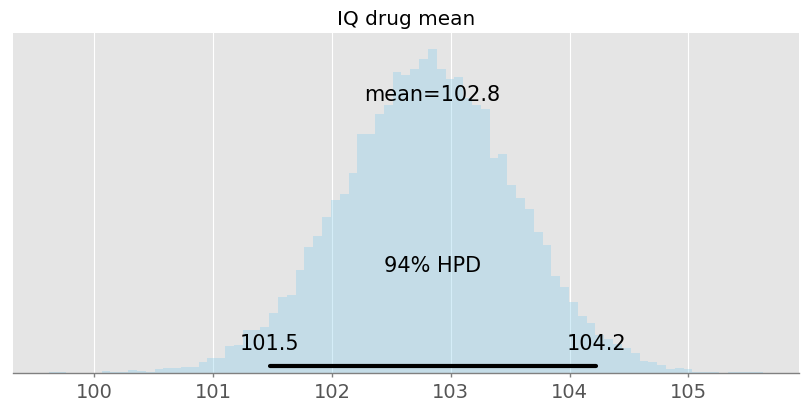

In [0]:
figsize(8,4)
pm.plot_posterior(kruschke_trace['mu_drug'][2000:], color='#87ceeb', kind = "hist")
plt.title("IQ drug mean")
plt.show()

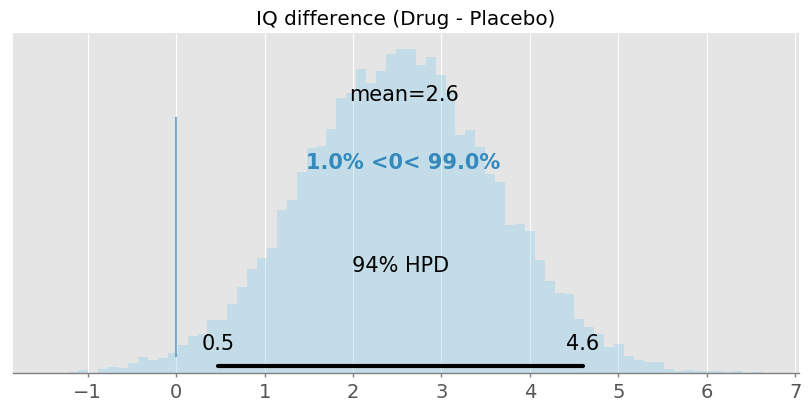

In [0]:
figsize(8,4)
pm.plot_posterior(kruschke_trace['diff_means'][2000:], color='#87ceeb', kind = "hist", ref_val=0)
plt.title("IQ difference (Drug - Placebo)")
plt.show()

<h2><center>¿Biológicamente que nos da a pensar que la diferencia de medias vaya de .4  a 4.6 puntos de IQ  con un 94% de probabilidad?</center></h2> 
  
  
 
* Generalmente en un *RCT* **BIEN HECHO** el efecto causal se mide con la diferencia de medias:

\begin{align}
\text{Average Treatment Effect} = E[IQ|Treatment] - E[IQ|Control] 
\end{align}


en el modelo pasado calculamos una distribución llamada "tamaño del efecto normalizado":
 * Una medida que popularizó **Cohen** que describe que el tamaño del efecto normalizado debe tomar en cuenta las deviaciones estandar de los grupos:
 
 
 \begin{align}
\text{Normalized size effect} = \frac{\text{ATE}}{\frac{\sigma_{treatment}^2 +\sigma_{control}^2 }{2}}
\end{align}
 
* <span style="color: red"> Nada a pequeño [0, 0.2] </span>
* <span style="color: blue"> Medio [0.2, 0.8] </span>
* <span style="color: green"> Grande [0.8, $\infty$) </span>
  
  

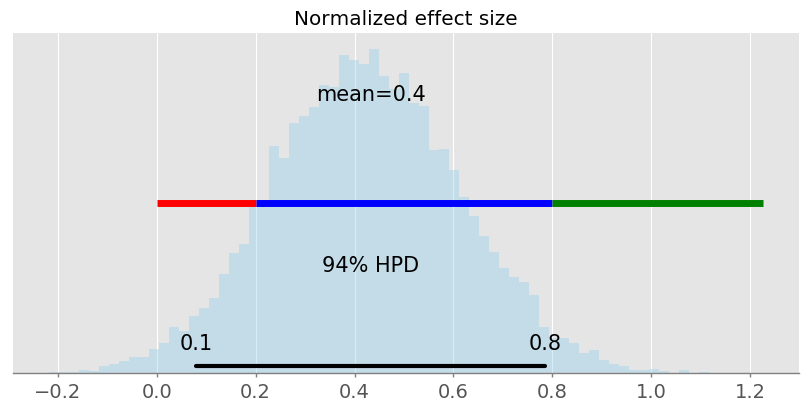

In [0]:
figsize(8,4)
pm.plot_posterior(kruschke_trace[2000:], 
                       var_names=['effect_size'],
                       color='#87ceeb',kind = "hist")
height = plt.ylim()[1] * 0.5
plt.hlines(height, 0, 0.2, 'red', lw=5)
plt.hlines(height, 0.2, 0.8, 'blue', lw=5)
plt.hlines(height, 0.8, plt.xlim()[1], 'green', lw=5)
plt.title("Normalized effect size")
plt.show()

(<Figure size 600x540 with 1 Axes>,
 array([<matplotlib.axes._subplots.AxesSubplot object at 0x7f3dc85c0da0>],
       dtype=object))

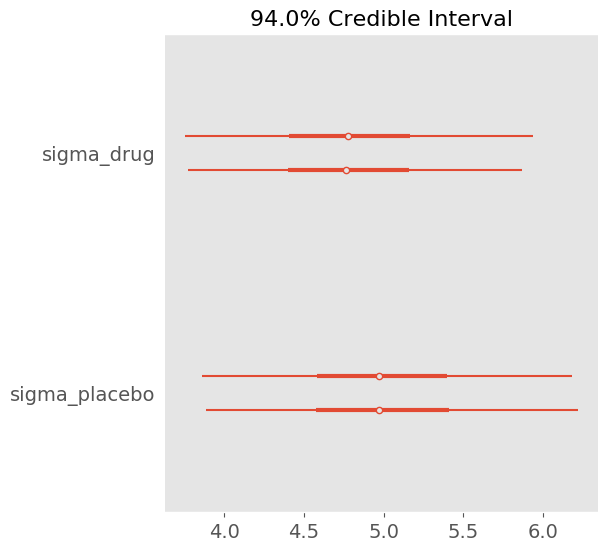

In [0]:
pm.forestplot(kruschke_trace[2000:], var_names=['sigma_drug',
                               'sigma_placebo'])

* ### Escencialmente el tamaño del efecto va de nada a grande HPD [0,.8]
* ### La *mejora* va de 0.4 a 4.6 puntos de IQ
* ### Los cambios no son consecuencia de la droga

# No significancia biológica

<h1><center> Regresión Lineal </center></h1>

vamos a generar nuestros datos:

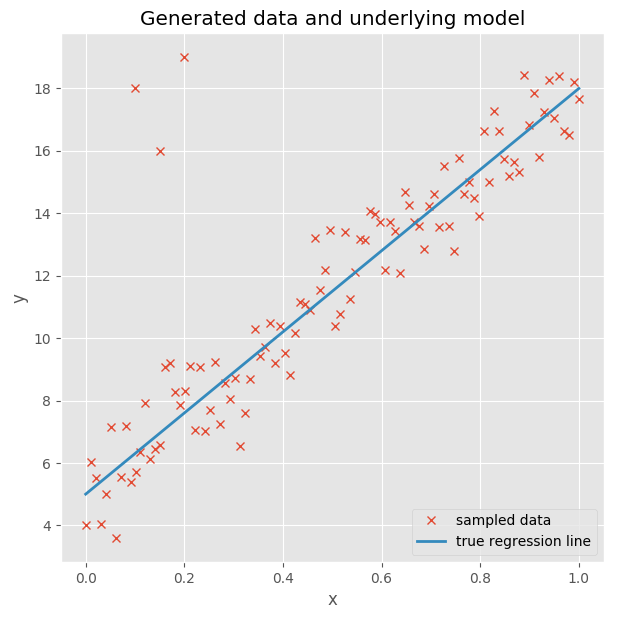

In [0]:
# Initialize random number generator
np.random.seed(123)

# True parameter values
alpha_true = 5
beta1_true = 13

# Size of dataset
size = 100

x = np.linspace(0, 1, size)
# y = a + b*x
true_regression_line = alpha_true + beta1_true * x
# add noise
y = true_regression_line + np.random.normal(scale=.9, size=size)

x_out = np.append(x, [.1, .15, .2])
y_out = np.append(y, [18, 16, 19])

data = dict(x=x_out, y=y_out)


fig = plt.figure(figsize=(7, 7))
ax = fig.add_subplot(111, xlabel='x', ylabel='y', title='Generated data and underlying model')
ax.plot(x_out, y_out, 'x', label='sampled data')
ax.plot(x, true_regression_line, label='true regression line', lw=2.)
plt.legend(loc=0)

<h1><center> Quick LM </center></h1>


>>>>>![linreg](https://ericmjl.github.io/bayesian-deep-learning-demystified/images/linreg-non-bayesian.png)


>>>>>![lin_reg_Bayes](https://ericmjl.github.io/bayesian-deep-learning-demystified/images/linreg-bayesian.png)

In [0]:
with pm.Model() as quick_lm_model:
    pm.glm.GLM.from_formula('y ~ x', data)
    trace = pm.sample(5000, cores=2, tune = 1000)

Auto-assigning NUTS sampler...
Initializing NUTS using jitter+adapt_diag...
Multiprocess sampling (2 chains in 2 jobs)
NUTS: [sd, x, Intercept]
Sampling 2 chains: 100%|██████████| 12000/12000 [00:12<00:00, 990.83draws/s]


array([[<matplotlib.axes._subplots.AxesSubplot object at 0x7ff1c35852b0>,
      dtype=object)

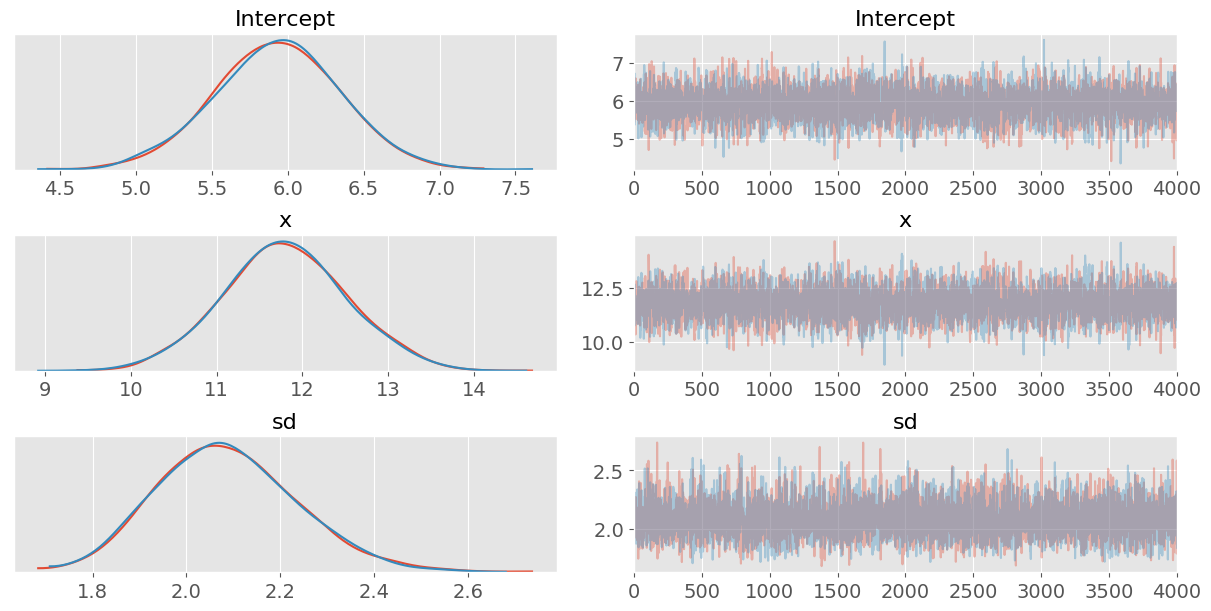

In [0]:
pm.traceplot(trace[1000:])

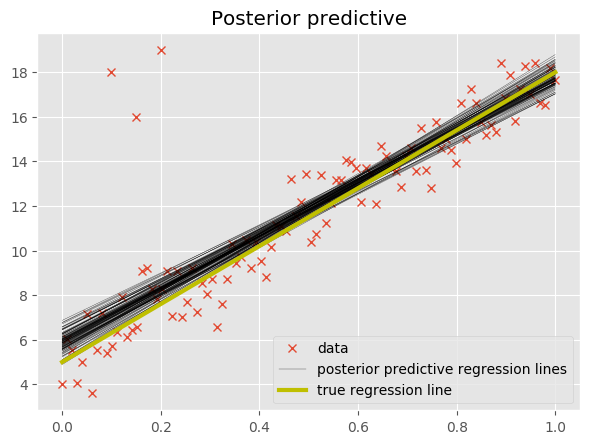

In [0]:
plt.figure(figsize=(7, 5))
plt.plot(x_out, y_out, 'x', label='data')
pm.plot_posterior_predictive_glm(trace, samples=100,
                                 label='posterior predictive regression lines')
plt.plot(x, true_regression_line,
         label='true regression line', lw=3., c='y')

plt.legend(loc=0)

<h1><center>Under the hood -> PyMC está declarando un modelo que se vería mas o menos así:</center></h1>



```
basic_lm_model = pm.Model()

with basic_lm_model:

    # Priors for unknown model parameters
    alpha = pm.Normal('alpha', mu= mu, sd=sd)
    beta1 = pm.Normal('beta1', mu= mu, sd=sd) 

    # Expected value of outcome
    mu = alpha + beta1 * x

    # Likelihood (sampling distribution) of observations
    Y_obs = pm.Normal('Y_obs', mu=mu, sd=1, observed=y)

    # draw 1000 posterior samples
    trace = pm.sample(1000)
```

### ya que el estimador OLS asume una distribución normal de los parámetros, sin embargo una ventaja del enfoque Bayesiano es que podemos usar las distribuciónes de probabilidad y sus carácteristicas a nuestro favor:


# Regresión Robusta

Auto-assigning NUTS sampler...
Initializing NUTS using jitter+adapt_diag...
Multiprocess sampling (2 chains in 2 jobs)
NUTS: [lam, x, Intercept]
Sampling 2 chains: 100%|██████████| 12000/12000 [00:12<00:00, 924.19draws/s]


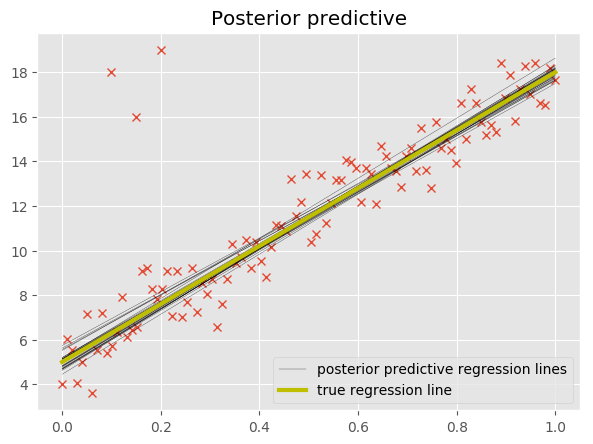

In [0]:
with pm.Model() as model_robust:
    family = pm.glm.families.StudentT()
    pm.glm.GLM.from_formula('y ~ x', data, family=family)
    trace_robust = pm.sample(5000, cores=2, tune=1000)

plt.figure(figsize=(7, 5))
plt.plot(x_out, y_out, 'x')
pm.plot_posterior_predictive_glm(trace_robust,
                                 label='posterior predictive regression lines')
plt.plot(x, true_regression_line,
         label='true regression line', lw=3., c='y')
plt.legend()

Resumen de parámetros regresión robusta:

In [0]:
pm.summary(trace_robust)

,mean,sd,mc_error,hpd_2.5,hpd_97.5,n_eff,Rhat
Intercept,4.887749,0.256916,0.003674,4.411320,5.412100,4356.037694,0.999901
x,13.126818,0.444912,0.006618,12.245432,13.984756,4437.271130,0.999916
lam,2.005660,0.501115,0.005720,1.104794,2.990747,6649.249397,1.000151


Resumen de parámetros regresión OLS:

In [0]:
pm.summary(trace)

,mean,sd,mc_error,hpd_2.5,hpd_97.5,n_eff,Rhat
Intercept,5.927301,0.408415,0.005981,5.097635,6.719579,4391.761851,0.999905
x,11.787820,0.711433,0.010329,10.361507,13.167966,4405.439929,0.999977
sd,2.085245,0.149280,0.001823,1.795459,2.375418,6462.116229,0.999909


<h1><center> Bayesian Deep Learning </center></h1>

* Las **redes neuronales** artificiales básicas, podemos concebirlas como un conjunto de combinaciones lineales con transformaciones no lineales.

Utilizaremos un ejemplo de juguete para explicar como podemos generar, una ANN sencilla con PyMC3

/usr/local/lib/python3.6/dist-packages/ipykernel_launcher.py:4: DeprecationWarning: Numeric-style type codes are deprecated and will result in an error in the future.
  after removing the cwd from sys.path.
/usr/local/lib/python3.6/dist-packages/ipykernel_launcher.py:5: DeprecationWarning: Numeric-style type codes are deprecated and will result in an error in the future.
  """


[Text(0, 0.5, 'Y'),
 Text(0.5, 0, 'X'),
 Text(0.5, 1.0, 'Clasificación binaria sencilla')]

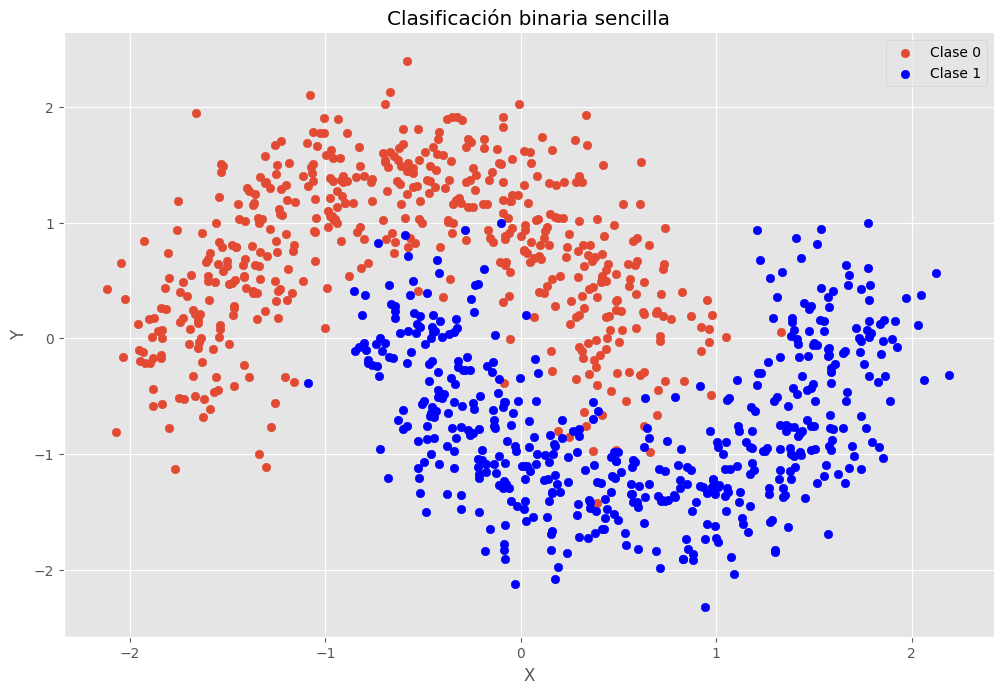

In [0]:
#@title Moonsdataset

X, Y = make_moons(noise=0.2, random_state=0, n_samples=1000)
X = scale(X)
X = X.astype('Float64')
Y = Y.astype('Float64')
X_train, X_test, Y_train, Y_test = train_test_split(X, Y, test_size=.5)

fig, ax = plt.subplots(figsize=(12, 8))
ax.scatter(X[Y==0, 0], X[Y==0, 1], label='Clase 0')
ax.scatter(X[Y==1, 0], X[Y==1, 1], color='b', label='Clase 1')
sns.despine(); ax.legend()
ax.set(xlabel='X', ylabel='Y', title='Clasificación binaria sencilla')

In [0]:
def construct_nn(ann_input, ann_output):
    
    n_hidden = 5
    
    # Iniciaremos aleatoreamente los pesos de nuestra red
    init_1 = np.random.randn(X.shape[1], n_hidden).astype("float64")
    init_2 = np.random.randn(n_hidden, n_hidden).astype("float64")
    init_out = np.random.randn(n_hidden).astype("float64")
        
    with pm.Model() as neural_network:
        # Definimos los pesos
        weights_in_1 = pm.Normal('w_in_1', 0, sd=1, 
                                 shape=(X.shape[1], n_hidden), 
                                 testval=init_1) #noten el argumento shape (entrada - salida)
        
        weights_1_2 = pm.Normal('w_1_2', 0, sd=1, 
                                shape=(n_hidden, n_hidden), 
                                testval=init_2)
        
        weights_2_out = pm.Normal('w_2_out', 0, sd=1, 
                                  shape=(n_hidden,), 
                                  testval=init_out)
        
        # ACTIVACIONES NO LINEALES + COMBINACION LINEAL
        act_1 = pm.math.tanh(pm.math.dot(ann_input, 
                                         weights_in_1))
        act_2 = pm.math.tanh(pm.math.dot(act_1, 
                                         weights_1_2))
        act_out = pm.math.sigmoid(pm.math.dot(act_2, 
                                              weights_2_out))
        
        # Clasificación binaria -> Distribución BERNOULLI
        out = pm.Bernoulli('out', 
                           act_out,
                           observed=ann_output,
                           total_size=Y_train.shape[0] 
                          )
    return neural_network

In [0]:
ann_input = theano.shared(X_train)
ann_output = theano.shared(Y_train)
neural_network = construct_nn(ann_input, ann_output)

In [0]:
with neural_network:
    inference = pm.ADVI()
    approx = pm.fit(n=50000, method=inference)

WARNING (theano.tensor.blas): We did not find a dynamic library in the library_dir of the library we use for blas. If you use ATLAS, make sure to compile it with dynamics library.
WARNING (theano.tensor.blas): We did not find a dynamic library in the library_dir of the library we use for blas. If you use ATLAS, make sure to compile it with dynamics library.
Average Loss = 124.32: 100%|██████████| 50000/50000 [00:56<00:00, 892.40it/s]
Finished [100%]: Average Loss = 124.28


Text(0.5, 0, 'iteration')

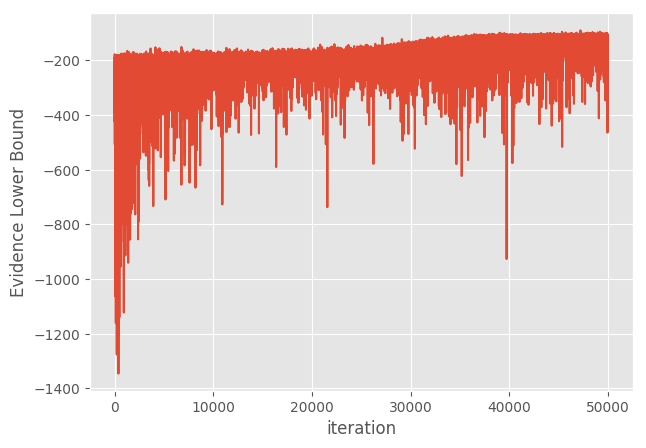

In [0]:
plt.figure(figsize(7,5))
plt.plot(-inference.hist)
plt.ylabel('Evidence Lower Bound')
plt.xlabel('iteration')

In [0]:
trace = approx.sample(draws=5000)

<h1><center>PREDICCION</center></h1>

In [0]:
ann_input.set_value(X_test) # remplazamos los valores por test
ann_output.set_value(Y_test)

with neural_network:
    ppc = pm.sample_posterior_predictive(trace, samples=1000, progressbar=False) # Utilizamos la posterior predictive distribution (Regresar en el notebook si no nos acordamos)

pred = ppc['out'].mean(axis=0) > 0.5 # asignamos clasificación para p >  0.5

Accuracy = 94.39999999999999%


<Figure size 700x500 with 0 Axes>

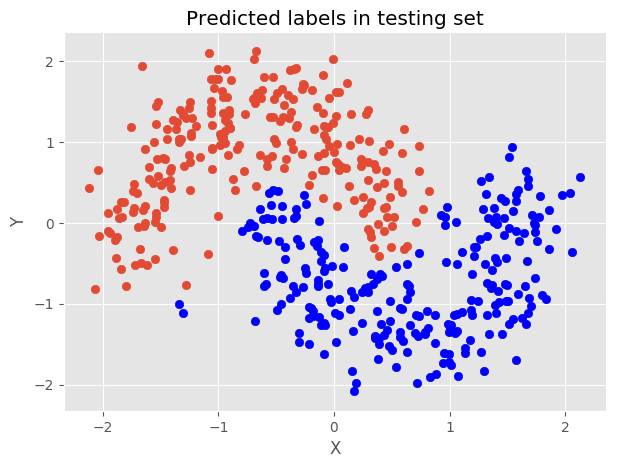

In [0]:
plt.figure(figsize(7,5))
fig, ax = plt.subplots()
ax.scatter(X_test[pred==0, 0], X_test[pred==0, 1])
ax.scatter(X_test[pred==1, 0], X_test[pred==1, 1], color='b')
sns.despine()
ax.set(title='Predicted labels in testing set', xlabel='X', ylabel='Y')
print('Accuracy = {}%'.format((Y_test == pred).mean() * 100))

Para observar que aprendió la red, una vez aprendidas las distribuciones de los parámetros, evaluaremos la salida de la red sobre un grid de tods los valores posibles

In [0]:
grid = pm.floatX(np.mgrid[-3:3:100j,-3:3:100j])
grid_2d = grid.reshape(2, -1).T
dummy_out = np.ones(grid.shape[1], dtype=np.int8)

ann_input.set_value(grid_2d)
ann_output.set_value(dummy_out)

with neural_network:
    ppc = pm.sample_ppc(trace, samples=500, progressbar=False)

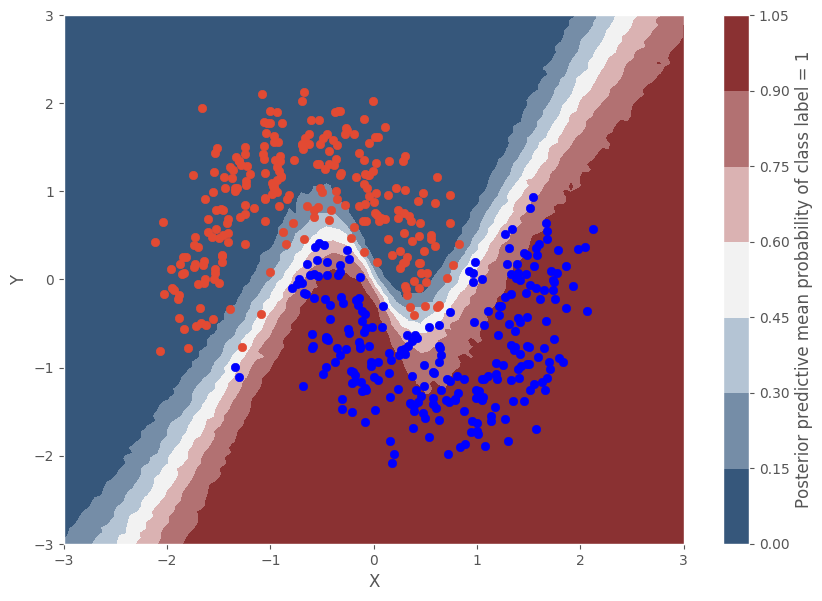

In [0]:
cmap = sns.diverging_palette(250, 12, s=85, l=25, as_cmap=True)
fig, ax = plt.subplots(figsize=(10, 7))
contour = ax.contourf(grid[0], grid[1], ppc['out'].mean(axis=0).reshape(100, 100), cmap=cmap)
ax.scatter(X_test[pred==0, 0], X_test[pred==0, 1])
ax.scatter(X_test[pred==1, 0], X_test[pred==1, 1], color='b')
cbar = plt.colorbar(contour, ax=ax)
_ = ax.set(xlim=(-3, 3), ylim=(-3, 3), xlabel='X', ylabel='Y');
cbar.ax.set_ylabel('Posterior predictive mean probability of class label = 1');

<h1><center> Pero BayES  incertidumbre </center></h1>

Text(0, 0.5, 'INCERTIDUMBRE DE LA PREDICCION')

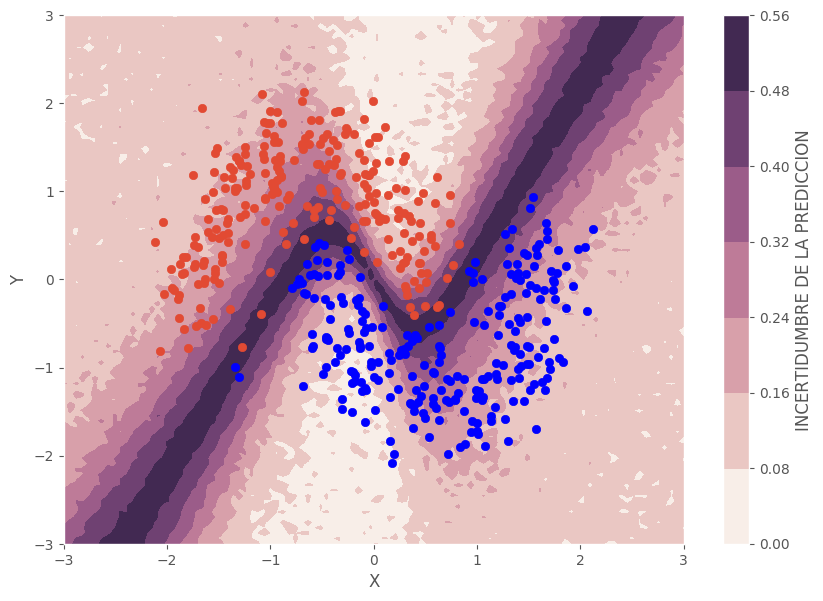

In [0]:
cmap = sns.cubehelix_palette(light=1, as_cmap=True)
fig, ax = plt.subplots(figsize=(10, 7))
contour = ax.contourf(grid[0], grid[1], ppc['out'].std(axis=0).reshape(100, 100), cmap=cmap)
ax.scatter(X_test[pred==0, 0], X_test[pred==0, 1])
ax.scatter(X_test[pred==1, 0], X_test[pred==1, 1], color='b')
cbar = plt.colorbar(contour, ax=ax)
_ = ax.set(xlim=(-3, 3), ylim=(-3, 3), xlabel='X', ylabel='Y');
cbar.ax.set_ylabel('INCERTIDUMBRE DE LA PREDICCION')

<h1><center> CREDITOS Y REFERENCIAS </center></h1>

<h2><center> Christopher Fonnesbeck </center></h2>
<h2><center> Jake VanderPlas </center></h2>
<h2><center> Eric J. Ma </center></h2>
<h2><center>Thomas Wiecki</center></h2>

 <h1><center> Libros </center></h1>


![think_bayes](https://i.pinimg.com/originals/b5/6a/be/b56abe45087a9c9791fc90e5d8288812.png)

![Bayesian_Hackers](https://images-eu.ssl-images-amazon.com/images/I/51rWytFIOhL.jpg)

![Doing Bayesian Data Analysis](https://sites.google.com/site/doingbayesiandataanalysis/_/rsrc/1403617861639/config/customLogo.gif?revision=5)

![Bayesian_Data_Analysis](https://images-na.ssl-images-amazon.com/images/I/51gfDsQ7vxL._SX330_BO1,204,203,200_.jpg)
